# ICE3333 - Elementos Finitos No-Lineales - Clase 1
## Método de Newton

Consideremos el sistema estructural de la figura

![image.png](nonlinear_truss.png)

Como vimos en cases,el equilibrio del sistema estructural queda gobernado por la siguiente ecuación no-lineal

\begin{equation}
G(x) = 2\left( \frac{L_o}{\sqrt{L_o^2 - 2x + x^2}} -1 \right)\cdot(1-x) - F_o = 0 \label{eq:residual}\tag{1}
\end{equation}

Donde $x= u/H$ es el desplazamiento normalizado, y $F_o = F/KH$ es la fuerza aplicada normalizada. Claramente, para un desplazamiento normalizado $x$ conocido podemos despejar el valor de la fuerza $F_o$, con lo cual podemos graficar esta relación


(-0.4, 0.4)

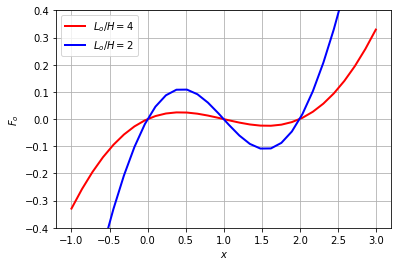

In [20]:
import numpy as np
import matplotlib.pyplot as plt

ubar = np.linspace(-1.0, 3.0, 30)

lo1 = 4.0
lo2 = 2.0


fbar1 = 2.0*(lo1/np.sqrt(lo1**2.0 - 2.0*ubar + ubar**2.0) -1.0)*(1.0-ubar)
fbar2 = 2.0*(lo2/np.sqrt(lo2**2.0 - 2.0*ubar + ubar**2.0) -1.0)*(1.0-ubar)

    
plt.plot(ubar,fbar1,'r-',lw=2, label=r'$L_o/H = 4$')
plt.plot(ubar,fbar2,'b-',lw=2, label=r'$L_o/H = 2$')
plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$F_o$')
plt.legend(loc=0)
plt.ylim([-0.4,0.4])

La pregunta ahora es: Dado un valor de la fuerza aplicada, cuál es el desplazamiento? De la ecuación \ref{eq:residual} no es posible despejar $x$ en función de $F_o$, por lo que debemos resolver un problema no-lineal usando el método de Newton.

Para efectos de la implementación del método de Newton, determinamos el operador tangente del residual como

\begin{equation}
DG(x) = \frac{d G}{d x}(x) = 2 \left\{ L_o(L_o^2 - 2x + x^2)^{-3/2} (1-x)^2 - L_o (L_o - 2x + x^2 )^{-1/2}+ 1  \right\}
\end{equation}

Luego, implementamos una rutina de solución basada en el método de Newton:

In [9]:
def NewtonSolver(g, dg, params, x0, tol, nitmax):

    err= tol+1.
    nit = 1
    x = x0

    while (nit < nitmax) and (err > tol):
        gn = g(x,params)
        dgn = dg(x,params)
        dxn = -gn/dgn
        x += dxn
        err = np.abs(dxn)
        print('iteration ', str(nit), ', error = ', str(err), ', xn = ', str(x), ', f(xn) = ', str(gn))
        nit += 1
    
    return x, g(x,params)

Luego, usamos esta rutina con el algoritmo general para resolver el caso del sistema estructural

In [11]:
import numpy as np


# Nonlinear Truss example: note p = [lo,fo]
g = lambda x, p : 2.0*(p[0]/np.sqrt(p[0]**2.- 2.*x + x**2.)-1.)*(1.-x) - p[1]  
dg = lambda x, p : 2.0*p[0]*(-x + 1.)**2./(p[0]**2. + x**2. - 2.*x)**(3./2.) - 2.0*p[0]/np.sqrt(p[0]**2. + x**2. - 2.*x) + 2.0 # sympy



params = [2.0,0.1]
x0 = 0.0
tol = 1e-12
maxit = 20

x, fx = NewtonSolver(g,dg,params,x0, tol,maxit)

iteration  1 , error =  0.2 , xn =  0.2 , f(xn) =  -0.1
iteration  2 , error =  0.08360079272787364 , xn =  0.28360079272787364 , f(xn) =  -0.022744261244930897
iteration  3 , error =  0.022278923020638126 , xn =  0.30587971574851175 , f(xn) =  -0.003958786964168251
iteration  4 , error =  0.0018033906703270237 , xn =  0.3076831064188388 , f(xn) =  -0.0002758569267817118
iteration  5 , error =  1.1894793230989665e-05 , xn =  0.3076950012120698 , f(xn) =  -1.7958090496872359e-06
iteration  6 , error =  5.172425377511997e-10 , xn =  0.3076950017293123 , f(xn) =  -7.808358126748516e-11
iteration  7 , error =  7.354357568865677e-16 , xn =  0.307695001729313 , f(xn) =  -1.1102230246251565e-16


Entonces, graficamos este punto sobre la relación fuerza desplazamiento conocida

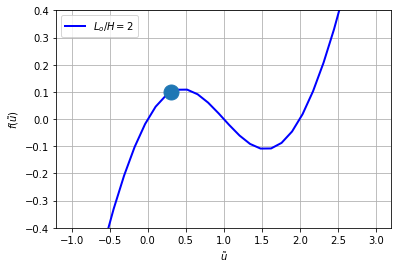

In [18]:
#plt.plot(ubar,fbar1,'r-',lw=2, label=r'$L_o/H = 4$')
plt.plot(ubar,fbar2,'b-',lw=2, label=r'$L_o/H = 2$')
plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$F_o$')
plt.legend(loc=0)
plt.ylim([-0.4,0.4])

plt.plot(x,params[1], marker = 'o', markersize=15)

Y vemos que cae justo sobre la curva. La pregunta ahora es qué pasa si cambiamos la estimación inicial, y consideramos que x0=2.0

iteration  1 , error =  0.2 , xn =  2.2 , f(xn) =  -0.1
iteration  2 , error =  0.030697268515255064 , xn =  2.1693027314847453 , f(xn) =  0.022020810194002316
iteration  3 , error =  0.0007188834299484293 , xn =  2.168583848054797 , f(xn) =  0.0004925644434521509
iteration  4 , error =  3.9876668708752054e-07 , xn =  2.1685834492881098 , f(xn) =  2.729240992926929e-07
iteration  5 , error =  1.2301880093085602e-13 , xn =  2.1685834492879867 , f(xn) =  8.419653863001031e-14


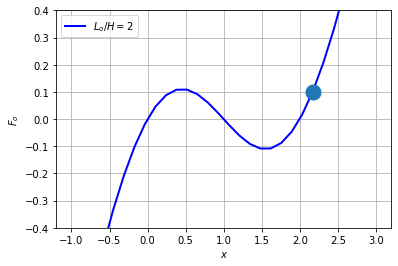

In [24]:
x0 = 2.0
x, fx = NewtonSolver(g,dg,params,x0, tol,maxit)

plt.plot(ubar,fbar2,'b-',lw=2, label=r'$L_o/H = 2$')
plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$F_o$')
plt.legend(loc=0)
plt.ylim([-0.4,0.4])

plt.plot(x,params[1], marker = 'o', markersize=15)

Vemos que el nuevo punto de equilibrio para una misma fuerza aplicada cambia significativamente, indicando que para el nivel de fuerza aplicado la solución no es única.